## Introdução

A **Mega-Sena** tem sido a maior modalidade lotérica do Brasil, sendo uma entre as dez modalidades atuais das loterias da Caixa (Caixa Econômica Federal), com sorteios ordinários duas vezes por semana, além da Mega-Sena da Virada.

Para ganhar o **prêmio máximo da Mega-Sena** — **a sena** — , é necessário acertar a sena, o que significa obter coincidência entre **seis dos números** apostados e os seis números sorteados, de um total de sessenta dezenas (**de 01 a 60**), independentemente da ordem da aposta ou da ordem do sorteio. 

O concurso prevê também a chance de se ganhar parte do prêmio máximo, pelo acerto da **quina** (apenas cinco dos números sorteados), ou da **quadra** (apenas quatro dos números sorteados), com prêmios significativamente menores que aquele que seria pago na ocorrência do acerto da sena, o da quina maior que o da quadra. 

## Extração de dados

A partir da planilha fornecida podemos extrair um grande quantidade de informações, dentre estas, vamos obter a frequencia de sorteio de cada um dos 60 números tanto num contexto geral quanto apenas nos casos onde houve ganhadores, bem como a distribuição de números pares e ímpares.


## Análise de sorteios

Após examinar todos os **2.025** concursos da Mega-Sena desde **11/03/1996**:

Sabemos que o sorteio é aleatório e todas as dezenas têm a mesma probabilidade de serem selecionadas, assim, sua distribuição de frequências se aproxima de uma distribuição uniforme.
Porém, na prática, temos visto que alguns números têm saído mais do que os outros.
Por exemplo o **05** foi sorteado **233 vezes** enquanto o **26** foi sorteado apenas **164 vezes**.
Desse modo, ainda que o histórico não garanta o futuro, **talvez seja prudente evitar os números com menor frequencia**.

![Imagem Frequencia](https://raw.githubusercontent.com/Ahrkano/Probabilidade/master/plot_1.png)


Nota-se ainda que, de todos os resultados da **Mega-Sena** a grande maioria segue um dos seguintes **esquemas táticos**: **3 pares e 3 ímpares**, **4 pares e 2 ímpares** ou **4 ímpares e 2 pares**. Combinações que diferem destas caem na minoria e, desse modo, saem menos, como pode ser copmprovado nos gráficos abaixo.

![Imagem Frequencia Pares e Impares](https://raw.githubusercontent.com/Ahrkano/Probabilidade/master/plot_2.png)



|| Pares | Impares ||
|--|-------|--------|
|0 | 22 | 24 |
|1 | 204| 184 |
|2 | 493 | 486 |
|3 | 612 | 612 |
|4 | 486 | 493 |
|5 | 184 | 204 |
|6 | 24 | 22 |

Até o concurso **2025** realizado em **2018-03-24**, **14.974.236** jogadores foram premiados.
A Caixa Econômica Federal já pagou **RS 21.244.698.928,33** em prêmios.
O valor recorde pago foi de **RS 306.718.743.68** registrado no concurso **1999** de **2017-12-31** quando **17** pessoas acertaram os números da **Mega da Virada**.

![Imagem Valores Premios](https://raw.githubusercontent.com/Ahrkano/Probabilidade/master/plot_3.png)



## Conclusão

Com base nos dados fornecidos e nas informações apuradas no decorrer da pesquisa é seguro afirmar que, apesar de os números possuirem a mesma chance de serem sorteados, alguns números aparecem mais que outros, logo, apostar em tais números, seguindo um modelo de 3 pares + 3 ímpares, 4 pares + 2 ímpares ou ainda 2 pares + 4 ímpares, não seria uma escolha ruim.
Vale ressaltar ainda que os valores das premiações aumentaram nos últimos 8 anos, o que leva a crer que o número de apostas cesceu substancialmente.




In [61]:
# Importar as bibliotecas necessárias
import pandas as pd
# Atribuir o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'
# Carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Imprimir o nome das planilhas
print(excel.sheet_names)
# Carregar a planilha excel para um objeto dataframe
dados = excel.parse(0)

['MegaSena']


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

    Após analisar os dados iniciais, é criado um dataframe contendo a quantidade de vezes que cada dezena bem como o valor
    integral do prêmio.
    

In [64]:
#contando e ordenando a quantidade de vezes emque as dezenas foram sorteadas
dez1 = dados['Dezena1'].value_counts().sort_index()
dez2 = dados['Dezena2'].value_counts().sort_index()
dez3 = dados['Dezena3'].value_counts().sort_index()
dez4 = dados['Dezena4'].value_counts().sort_index()
dez5 = dados['Dezena5'].value_counts().sort_index()
dez6 = dados['Dezena6'].value_counts().sort_index()

#lista ordenada de dezenas sorteadas
num_sorteados = dez1+dez2+dez3+dez4+dez5+dez6

#todas as dezenas possiveis
linhas = np.arange(1,61)

#dataframe para armazenar as informacoes extraidas 
df = pd.DataFrame(index=linhas, columns=['Numero'])

df['Numero'] = linhas

df['Frequencia'] = num_sorteados

df['Premio_Sena'] = dados['Rateio_Sena']*dados['Ganhadores_Sena']

#calculando a frequencia de sorteio das dezenas quando houve ganhadores na sena
winners = dados.loc[dados['Ganhadores_Sena']>0]

dez1_sena = winners['Dezena1'].value_counts().sort_index()
dez2_sena = winners['Dezena2'].value_counts().sort_index()
dez3_sena = winners['Dezena3'].value_counts().sort_index()
dez4_sena = winners['Dezena4'].value_counts().sort_index()
dez5_sena = winners['Dezena5'].value_counts().sort_index()
dez6_sena = winners['Dezena6'].value_counts().sort_index()
dez_tot = dez1_sena+dez2_sena+dez3_sena+dez4_sena+dez5_sena+dez6_sena
df['Frequencia_Sena'] = dez_tot

#calculando a frequencia de sorteio das dezenas quando houve ganhadores na quina
winners = dados.loc[dados['Ganhadores_Quina']>0]

dez1_qui = winners['Dezena1'].value_counts().sort_index()
dez2_qui = winners['Dezena2'].value_counts().sort_index()
dez3_qui = winners['Dezena3'].value_counts().sort_index()
dez4_qui = winners['Dezena4'].value_counts().sort_index()
dez5_qui = winners['Dezena5'].value_counts().sort_index()
dez6_qui = winners['Dezena6'].value_counts().sort_index()
dez_tot = dez1_qui+dez2_qui+dez3_qui+dez4_qui+dez5_qui+dez6_qui
df['Frequencia_Quina'] = dez_tot

#calculando a frequencia de sorteio das dezenas quando houve ganhadores na quadra
winners = dados.loc[dados['Ganhadores_Quadra']>0]

dez1_qua = winners['Dezena1'].value_counts().sort_index()
dez2_qua = winners['Dezena2'].value_counts().sort_index()
dez3_qua = winners['Dezena3'].value_counts().sort_index()
dez4_qua = winners['Dezena4'].value_counts().sort_index()
dez5_qua = winners['Dezena5'].value_counts().sort_index()
dez6_qua = winners['Dezena6'].value_counts().sort_index()
dez_tot = dez1_qua+dez2_qua+dez3_qua+dez4_qua+dez5_qua+dez6_qua
df['Frequencia_Quadra'] = dez_tot

#Valor total pago pela Caixa Economica Federal desde 1996-03-11 ate 2018-03-24
valor = ((dados['Rateio_Sena']*dados['Ganhadores_Sena']).sum())
valor = valor + ((dados['Rateio_Quina']*dados['Ganhadores_Quina']).sum())
valor = valor +((dados['Rateio_Quadra']*dados['Ganhadores_Quadra']).sum())

#quantidade de ganhadores total
ganhador = (dados['Ganhadores_Quadra'].sum()) + (dados['Ganhadores_Quina'].sum()) + (dados['Ganhadores_Sena'].sum())

#maior premio pago na Sena
meq = pd.DataFrame(dados['Data Sorteio'])
meq['Pagamento'] = (dados['Ganhadores_Sena']*dados['Rateio_Sena'])
meq['Pagamento'].max()

#imprime os primeiros 5 elementos apenas para criterio de observacao
df.head()

,Numero,Frequencia,Premio_Sena,Frequencia_Sena,Frequencia_Quina,Frequencia_Quadra
1,1,202,2307162.23,62,202,202
2,2,209,782385.02,43,209,209
3,3,191,0.00,62,191,191
4,4,224,0.00,53,224,224
5,5,233,0.00,78,233,233


    Iteração sobre as colunas referentes às dezenas sorteadas em todos os concursos contando em cada jogo qual a 
    quantidade de pares e ímpares

In [4]:
#criando dataframe apenas com as dezenas sorteadas
colunas = ["Dezena1", "Dezena2", "Dezena3", "Dezena4", "Dezena5", "Dezena6"]
paridade = pd.DataFrame(dados[colunas])

#adicionando colunas para contabilizar numeros pares e impares
paridade['Pares'] = 0
paridade['Impares'] = 0

#percorrendo o dataframe e testando se os valores de cada linha sao pares e impares
for i in np.arange(0,2025):
    
    seq = paridade[colunas].iloc[i].tolist()
    
    for j in np.arange(0,6):
        if seq[j]%2 == 0:
            paridade['Pares'].iloc[i] = paridade['Pares'].iloc[i] +1
        else:
            paridade['Impares'].iloc[i] = paridade['Impares'].iloc[i] +1
            
#imprime os primeiros 5 elementos apenas para criterio de observacao
paridade.head()

,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Pares,Impares
0,41,5,4,52,30,33,3,3
1,9,39,37,49,43,41,0,6
2,36,30,10,11,29,47,3,3
3,6,59,42,27,1,5,2,4
4,1,19,46,6,16,2,4,2


    Criando gráfico com a distribuição de valores pares e ímpares de todos os jogos

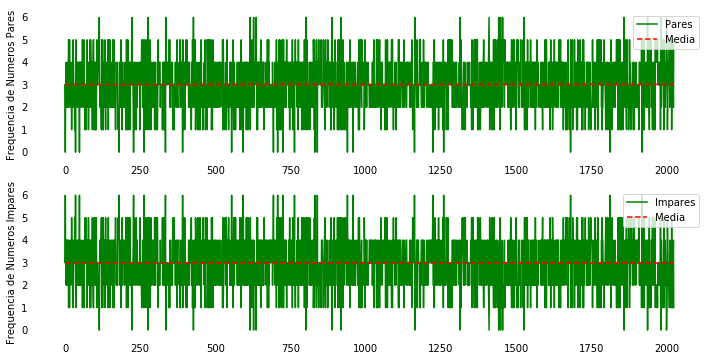

In [68]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#quantidade de concursos realizados
space = np.arange(0,2025)

ax1.plot(space, paridade['Pares'], c='green')
ax1.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax1.set_ylabel('Frequencia de Numeros Pares')

#calculando a media dos valores pares
mean_pares = [np.mean(paridade['Pares'])]*2025
ax1.plot(space, mean_pares, c='red' ,label='Media', linestyle='--')
ax1.legend(loc='upper right')

ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2.plot(space, paridade['Impares'], c='green')
ax2.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax2.set_ylabel('Frequencia de Numeros Impares')

#calculando a media dos valores impares
mean_impares = [np.mean(paridade['Impares'])]*2025
ax2.plot(space, mean_impares, c='red' ,label='Media', linestyle='--')
ax2.legend(loc='upper right')

ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)


plt.show(fig)

    Criando gráfico com a quantidade de vezes em que os números foram sorteados

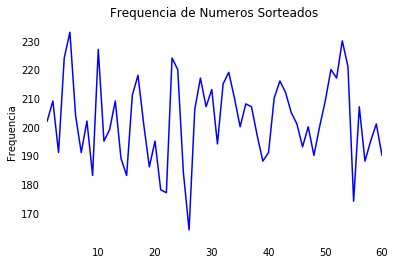

In [66]:
fig, ax = plt.subplots()

plt.plot(linhas, df['Frequencia'], c='blue')

plt.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')

plt.title('Frequencia de Numeros Sorteados')
ax.set_ylabel('Frequencia')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xlim(left=1, right=60)

plt.show(fig)

    Criando gráfico que mostra os valores pagos na Sena em cada concurso

    Criando gráfico com valor das premiações da Sena da Quadra e da Quina

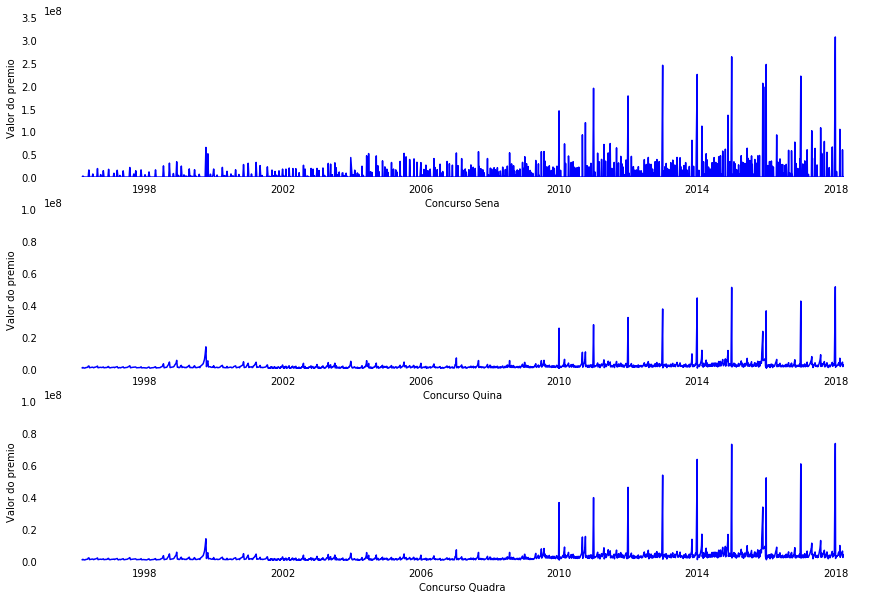

In [67]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

#grafico referente a Sena
ax1.plot(dados['Data Sorteio'], dados['Rateio_Sena']*dados['Ganhadores_Sena'] , label='Premio Sena', c='blue')
ax1.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax1.set_ylabel('Valor do premio')
ax1.set_xlabel('Concurso Sena')
ax1.set_ylim(bottom=0, top=3.5e8)

ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

#grafico referente a Quina
ax2.plot(dados['Data Sorteio'], dados['Rateio_Quina']*dados['Ganhadores_Quina'] , label='Premio Quina', c='blue')
ax2.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax2.set_ylabel('Valor do premio')
ax2.set_xlabel('Concurso Quina')
ax2.set_ylim(bottom=0, top=1e8)

ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

#grafico referente a Quadra
ax3.plot(dados['Data Sorteio'], dados['Rateio_Quadra']*dados['Ganhadores_Quadra'] , label='Premio Quadra', c='blue')
ax3.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax3.set_ylabel('Valor do premio')
ax3.set_xlabel('Concurso Quadra')
ax3.set_ylim(bottom=0, top=1e8)

ax3.spines["right"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

plt.show(fig)